# Некоторые визуализации по следам лекций по визуализации Александра Геннадьевича Дьяконова в Ozon Masters

In [1]:
from scipy.sparse.linalg import svds
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.cm import ScalarMappable
from sklearn.model_selection import train_test_split

Рассмотрим визуализации на прмере датасета Heart Disease UCI https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Далее несколько функций, которые помогут нам в визуализации.

In [4]:
def make_clips(data, name):
    return (data[name].clip(lower=data[name].quantile(0.01),
upper=data[name].quantile(0.99)).values)

def drow_hist(df, feature, bins=None, title='bar_hist', width=0.7, x_labels=None, density=True, clip=False):
    '''
    x - data
    '''
    if clip:
        x = make_clips(df, feature)[feature]
    else:
        x = df[feature]
    fig, ax = plt.subplots(figsize=(9, 6))
    y = np.unique(x, return_counts=True)
    if y[0].shape[0] < 20:
        ax.bar(y[0], y[1], width, color='#e5f5f9')
        ax.set_xticks(y[0])
        for i in range(y[0].shape[0]):
            ax.annotate('{}'.format(y[1][i]),
                        xy=(y[0][i], y[1][i]),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
        if x_labels:
            ax.set_xticklabels(x_labels)
    else:
        if not bins:
            bins = int(x.shape[0] / 10)
        if density:
            ax.hist(x, bins, density=True)
            density = gaussian_kde(x)
            xs = np.linspace(x.min(), x.max(), 200)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(xs,density(xs))
        else:
            ax.hist(x, bins)
    ax.set_xlabel(feature)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [5]:
def drow_hist_with_target(df, feature, target, title='bar', width=0.7, x_labels=None, clip=False):
    '''
    For 0, 1 target
    feature, target - columns names
    '''
    if clip:
        df = make_clips(df, feature)
    x = np.unique(df[feature], return_counts=True)
    y = df[[feature, target]].groupby([feature]).sum()[target]
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.bar(x[0], x[1], width, label='0', color='#e5f5f9')
    ax.bar(x[0], y, width, label='1', color='#2ca25f')
    ax.set_xticks(x[0])
    for i in range(x[0].shape[0]):
        ax.annotate('{}'.format(x[1][i]),
                    xy=(x[0][i], x[1][i]),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

    if x_labels:
        ax.set_xticklabels(x_labels)
    ax.set_title(title)
    ax.legend()
    fig.tight_layout()
    plt.show()

In [6]:
def drow_train_test_density(df_train, df_test, feature):
    fig, ax = plt.subplots(figsize=(9, 6))
    x_train = df_train[feature]
    density = gaussian_kde(x_train)
    xs = np.linspace(x_train.min(), x_train.max(), 200)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    ax.plot(xs, density(xs), label='train', color='#e6550d')
    x_test = df_test[feature]
    density = gaussian_kde(x_test)
    xs = np.linspace(x_test.min(), x_test.max(), 200)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    ax.plot(xs, density(xs), label='test', color='#2ca25f')
    ax.legend()
    ax.set_title('Сравнение теста и обучения')
    ax.set_xlabel(feature)
    fig.tight_layout()
    plt.show()

In [7]:
def drow_feature_statistic(df, statistic='mean', size=50):
    '''
    for df with numeric features
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    x = np.arange(df.shape[1])
    if statistic == 'mean':
        y = np.nanmean(df, axis=0)
        ax.set_ylabel('mean')
    if statistic == 'std':
        y = np.nanstd(df, axis=0)
        ax.set_ylabel('std')
    if statistic == 'median':
        y = np.nanmedian(df, axis=0)
        ax.set_ylabel('median')
    if statistic == 'var':
        y = np.nanvar(df, axis=0)
        ax.set_ylabel('std')
    ax.scatter(x, y, size)
    ax.set_xlabel('Num of feauter')
    fig.tight_layout()
    plt.show()

In [8]:
def drow_targets_by_features(df, feature_1, feature_2, target, size=50, shum_1=0, shum_2=0):
    fig, ax = plt.subplots(figsize=(9, 6))
    color_dic = {
        0: '#e6550d',
        1: '#99d8c9',
        2: '#deebf7'}
    classes = df[target].unique()
    for cl in classes:
        df_class = df[df[target] == cl]
        ax.scatter(df_class[feature_1] +
                       np.random.rand(df_class.shape[0]) *
                       (max(df_class[feature_1]) - min(df_class[feature_1])) *
                       shum_1,
                   df_class[feature_2] +
                       np.random.rand(df_class.shape[0]) * 
                       (max(df_class[feature_2]) - min(df_class[feature_2])) *
                       shum_2,
                   s=size,
                   c=color_dic[cl],
                   label=f'{cl}')
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.legend()
    fig.tight_layout()
    plt.show()

In [9]:
def drow_correlations(df):
    fig, ax = plt.subplots(figsize=(9, 6))
    cr = df.corr()
    ii, _, _ = svds(cr, k=1)
    ii = np.argsort(ii[:,0])
    ax.imshow(cr.iloc[ii, ii], interpolation='none')
    ax.set_xticks(np.arange(cr.shape[0]))
    ax.set_yticks(np.arange(cr.shape[1]))
    ax.set_xticklabels(df.columns[ii])
    ax.set_yticklabels(df.columns[ii])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    fig.colorbar(ScalarMappable(), ax=ax)
    fig.tight_layout()
    plt.show()

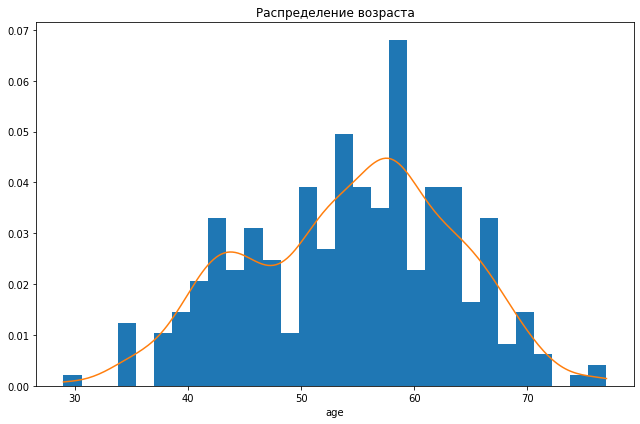

In [10]:
drow_hist(df, 'age', title='Распределение возраста', density=True)

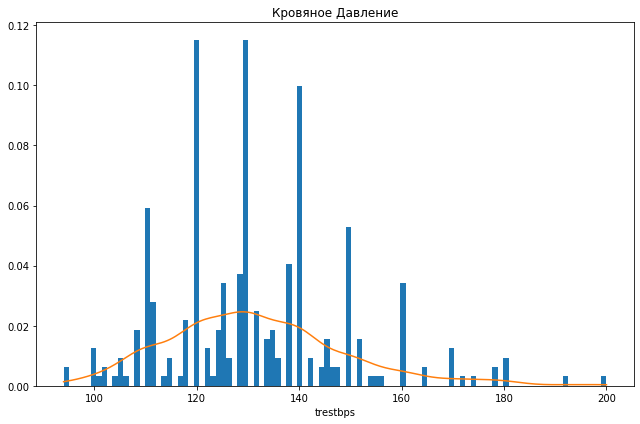

In [11]:
drow_hist(df, 'trestbps', bins=100, title='Кровяное Давление')

На этой диаграмме заметны преобладание круглых чисел - 100, 120, 140 - скорее всего замеры делали врачи, округляющие значения, возможно получится использовать эту информацию =)

Следующие диаграммы категориальных признаков показывают что они сами неплохо разделяют таргет.

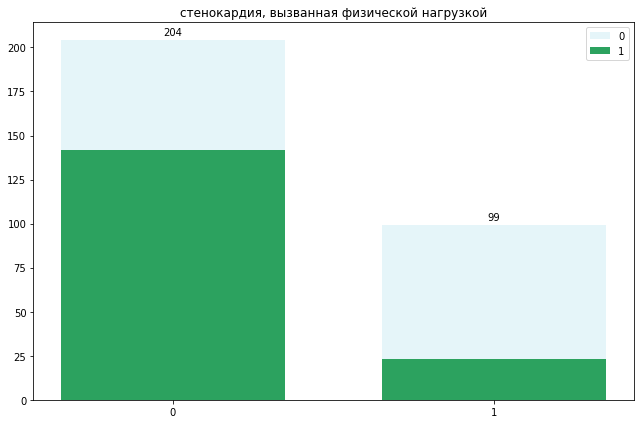

In [12]:
drow_hist_with_target(df, 'exang', 'target', title='стенокардия, вызванная физической нагрузкой')

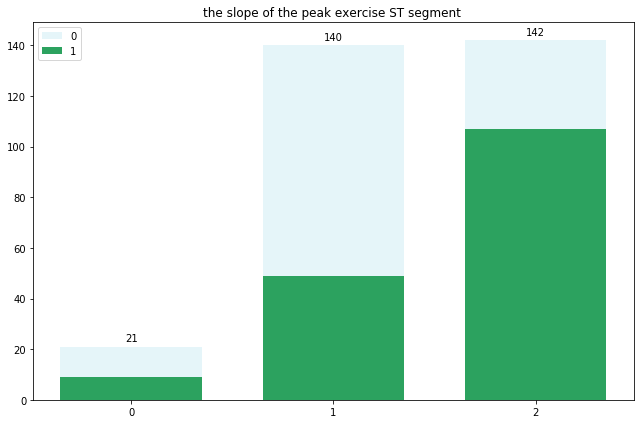

In [13]:
drow_hist_with_target(df, 'slope', 'target', title='the slope of the peak exercise ST segment ')

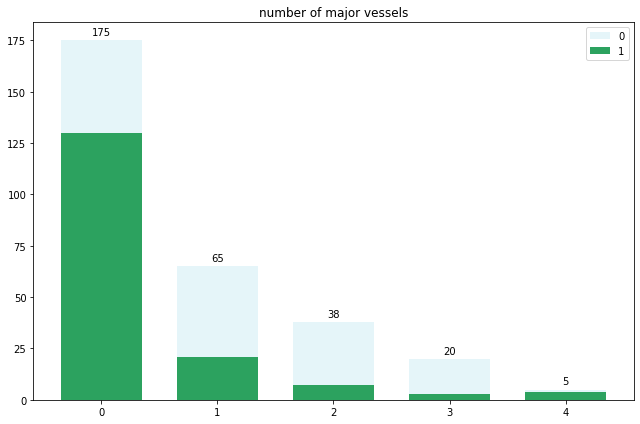

In [14]:
drow_hist_with_target(df, 'ca', 'target', title='number of major vessels')

Теперь попробуем разбить данные на обучение и тест

In [15]:
train, test = train_test_split(df)

И посмотрим насколько хорошо получилось

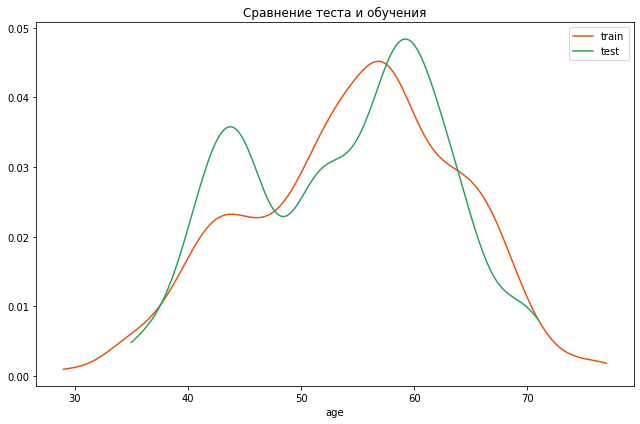

In [16]:
drow_train_test_density(train, test, 'age')

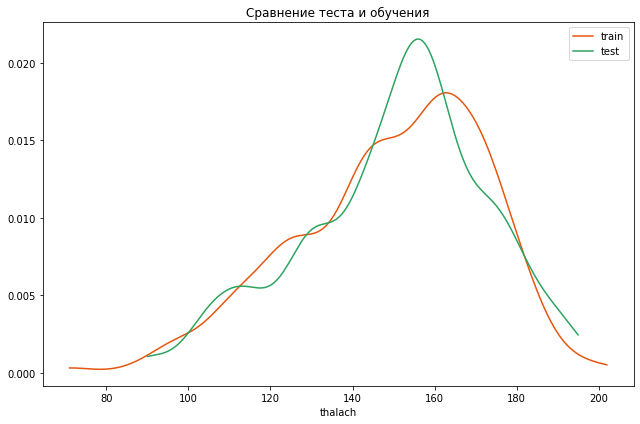

In [17]:
drow_train_test_density(train, test, 'thalach')

Учитывая что данных немного, получилось разбить достаточно неплохо, распределения похожи.

Теперь посмотрим на пары признаков

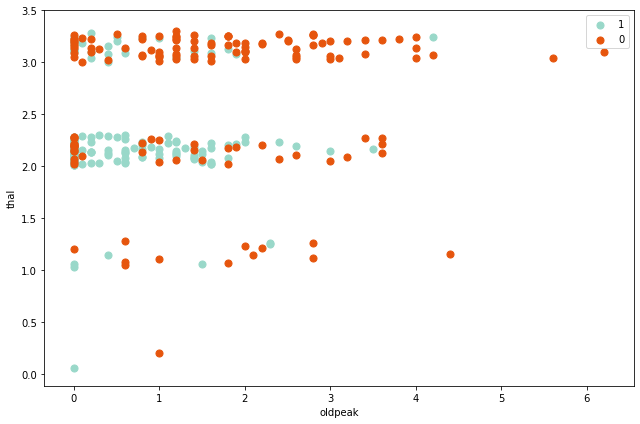

In [18]:
drow_targets_by_features(df, 'oldpeak', 'thal', 'target', shum_1=0, shum_2=0.1)

Тут просматривается хорошая разделимость при thal=3

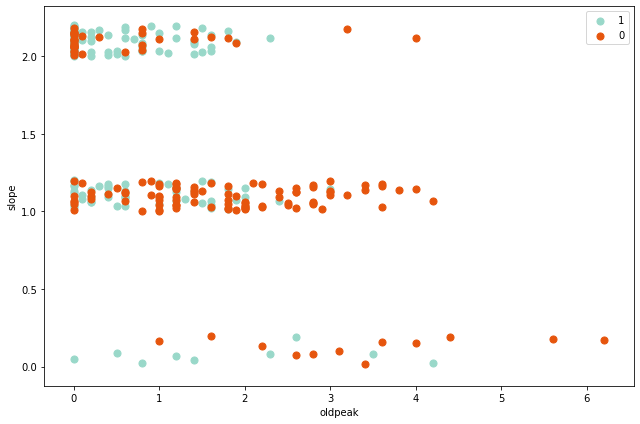

In [19]:
drow_targets_by_features(df, 'oldpeak', 'slope', 'target', shum_1=0, shum_2=0.1)

И также при slope=1

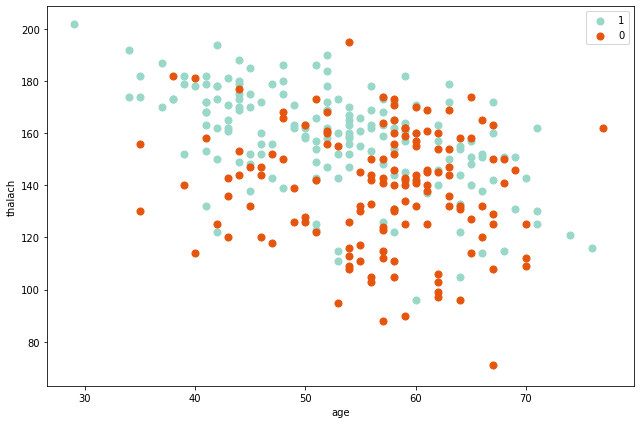

In [20]:
drow_targets_by_features(df, 'age', 'thalach', 'target', shum_1=0, shum_2=0)

А тут кажется можно отделить левую верхнюю четверть.

Такие визуализации приводят к мысли что тут будет хорошо работать алгоритмы, основанные на деревьях.

Взглянем на корреляции

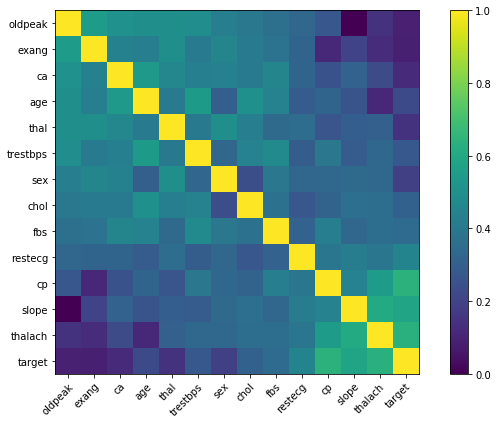

In [21]:
drow_correlations(df)

А вот здесь видно что slope и thalach неплохо коррелируют с targetом, возможно на них стоит попробовать линейные методы =)